# Analyse stochastic simulations of parameter sweep ($\mu$)

Author: Juvid Aryaman

In [1]:
import mitonetworks.det as mtd
import mitonetworks.stoch as mts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
mts.reset_plots()

In [5]:
analysis = mts.AnalyseDataFeedbackControl(dir_df_params = '../param_sweep_vals.csv',ctrl_name='lfc',
        dir_data = '../Data/',plotextensions=['png']
)
    
analysis.make_gradients()
analysis.compute_errors()

In [6]:
analysis.df_params

,b,beta,delta,gamma,kappa,mf_init,ms_init,mu,wf_init,ws_init,xi
0,0.000012,33.12,1.0,0.037851,258.50,160,140,0.01725,373,326,0.0
1,0.000012,33.12,1.0,0.037851,-483.25,160,140,0.03450,373,326,0.0
2,0.000012,33.12,1.0,0.037851,-730.00,160,140,0.04025,374,326,0.0
3,0.000012,33.12,1.0,0.037851,-977.50,160,140,0.04600,374,326,0.0


In [7]:
mu_nom = 0.023
R_m = analysis.df_params['mu']/float(mu_nom)
n_m = len(R_m)

In [15]:
analysis.plotextensions = ['png','svg']

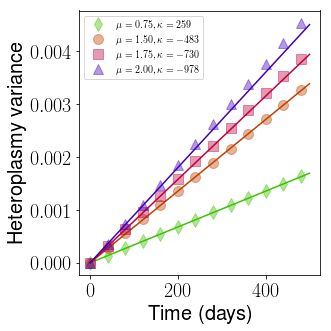

In [16]:
leg_list = [r"$\mu={0:.2f}, \kappa = {1}$".format(R_m[i], int(round(analysis.df_params['kappa'][i]))) for i in range(n_m)]
analysis.plot_vh_param_sw(range(n_m), leg_list,figname="mu_sw_lfc",sparsify_data=True)